# Logistic Regression and Image Classification

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import online data
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#input variable or features(X)
digits.data.shape
X = digits.data
#1797 means pictures  and 64 means size of pictures is 8*8

In [4]:
#ouput labels(y)
digits.target.shape
y = digits.target

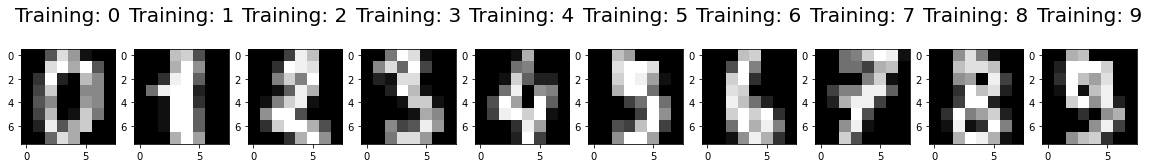

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [7]:
print("Train input data:", X_train.shape)
print("Test input data:", X_test.shape)
print("Train output data:", y_train.shape)
print("Test output data:", y_test.shape)

Train input data: (1437, 64)
Test input data: (360, 64)
Train output data: (1437,)
Test output data: (360,)


In [8]:
#To train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
model

C:\Users\mirfa\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
#Accuracy test
score = model.score(X_test, y_test)
print("The accuracy score is:", score)

The accuracy score is: 0.9666666666666667


# Confusion matrix

In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

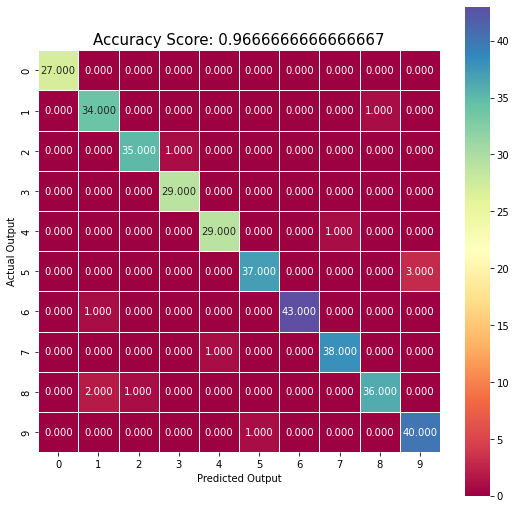

In [19]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidth=.5, square =True, cmap = 'Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [20]:
#Getting miss classified labels
index = 0
missclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict :
        missclassifiedIndexes.append(index)
        index +=1

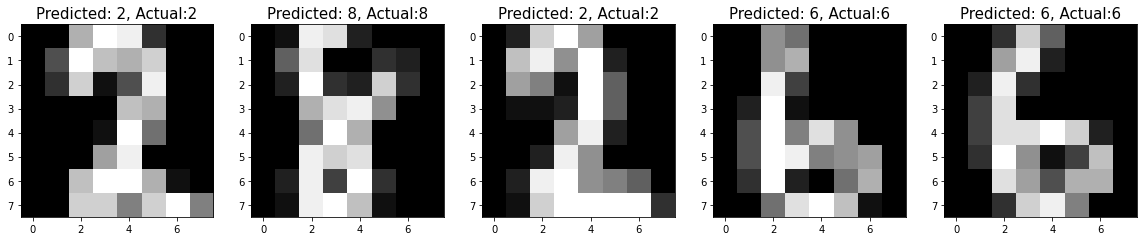

In [25]:
#plotting missclassified lables with known labels
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(missclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual:{}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)